#### 1.1 What is an Exchange-Traded Fund (ETF)?

An ETF is a collection of assets whose shares are traded on a stock market. They combine the characteristics and potential benefits of stocks, mutual funds, and bonds. ETF shares, like individual stocks, are traded throughout the day at varying prices based on supply and demand.

#### 1.2 Pick 1 of the funds in the data set, and find the weightings.  Show in Python table

In [36]:
# weighted average for LUXXX

weighted = dframe.groupby("Date")["LUXXX"].mean()
print (weighted)

Date
1-Apr-16    1460.223
1-Dec-17    1631.147
1-Feb-19    1437.316
1-Jan-16    1390.716
1-Jul-16    1454.413
              ...   
9-Jun-17    1721.569
9-Mar-18    1585.330
9-Nov-18    1533.675
9-Oct-20    1075.670
9-Sep-16    1583.787
Name: LUXXX, Length: 252, dtype: float64


#### 2.1 Import the data from the csv file

In [164]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [19]:
dframe = pd.read_csv('MScFE 650 MLF GWP Data.csv')
dframe.head()

,Date,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,1-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
1,8-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2,15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
3,22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
4,29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


#### 3.1 Summarize the min, max, mean, median, and standard deviation of each column

In [21]:
dframe.describe()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1457.231905,2526.652262,3029.482978,1183.940159,127.418889,91.290238,1813.989167,1970.821627,76.788214,8447.657738,...,2720.597183,1460.507817,595.207738,1618.220755,1348.088135,106.673413,12385.389048,1208.081468,2013.187579,2526.448532
std,238.611226,899.378857,516.678825,101.261295,24.770889,12.106033,354.986912,143.502890,13.192648,978.216958,...,292.192348,284.660584,92.229158,157.305041,93.417184,12.367770,1101.073211,113.761591,181.105639,382.318512
min,871.500000,844.090000,1722.870000,957.150000,78.290000,57.440000,879.170000,1503.010000,48.160000,6671.370000,...,2049.320000,720.230000,344.450000,1263.900000,942.480000,76.340000,9901.400000,1001.930000,1484.410000,1768.520000
25%,1320.741000,1773.735000,2730.897500,1125.265000,102.820000,86.830000,1589.772500,1901.960000,66.552500,7912.862500,...,2509.495000,1224.482500,536.347500,1478.917525,1295.695000,99.715000,11769.345000,1131.110000,1937.375000,2242.712500
50%,1491.081000,2541.975000,3113.414050,1177.375000,130.635000,95.015000,1860.960000,1990.630000,78.710000,8227.805000,...,2795.265000,1555.135000,594.125000,1666.280000,1351.055000,109.280000,12526.645000,1194.815000,2081.695000,2559.080000
75%,1656.015500,3138.222500,3460.390000,1241.797500,146.950000,100.512500,2116.162500,2076.865000,86.532500,8554.552500,...,2985.502500,1692.932500,643.987500,1728.582500,1403.500000,114.397500,12975.560000,1299.405000,2146.630000,2777.425000
max,1812.010000,4467.410000,3750.865500,1431.460000,177.580000,107.340000,2404.740000,2261.280000,103.540000,11852.360000,...,3217.240000,1892.670000,852.930000,1920.630000,1591.700000,128.220000,14989.150000,1484.520000,2255.520000,3386.440000


#### 4.1 Write a Python function that graphs 1 time series with appropriate time labels

Text(0.5, 1.0, 'Time Series 1')

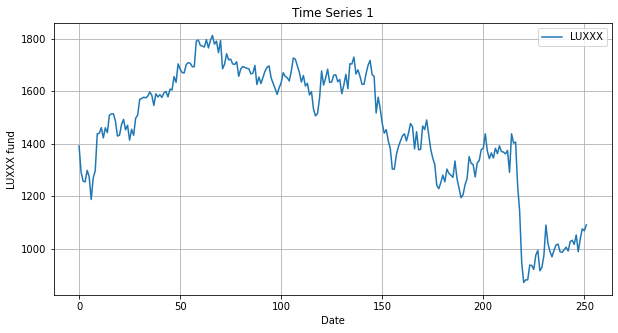

In [49]:
time_series1 = dframe[['LUXXX']]
time_series1.plot(figsize=(10,5), grid=True)
plt.xlabel('Date')
plt.ylabel('LUXXX fund')
plt.title('Time Series 1')

In [ ]:
time_series2 = dframe[['LUXXX', 'MSCI ARGENTINA']]
one_series.plot()

two_series=df[['LUXXX','MSCI BRAZIL']]
two_series.plot()

two_series['LUXXX_daily_return']= two_series['LUXXX'].pct_change()*100
two_series['MSCI BRAZIL_daily_return']= two_series['MSCI BRAZIL'].pct_change()*100
two_series[['LUXXX_daily_return','MSCI BRAZIL_daily_return']].plot()

#### 4.2 Write a Python function that graphs 2 time series on the same plot, with labels 

Text(0.5, 1.0, 'Time Series 2')

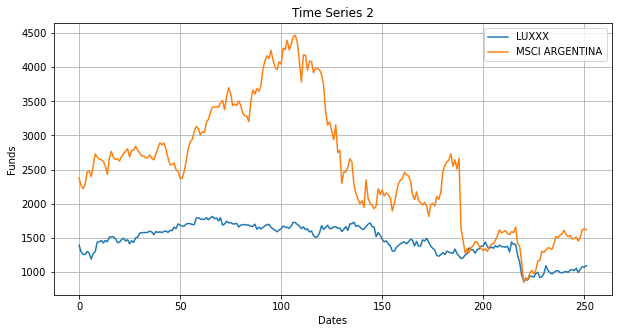

In [48]:
time_series2 = dframe[['LUXXX', 'MSCI ARGENTINA']]
time_series2.plot(figsize=(10,5), grid=True)
plt.xlabel('Dates')
plt.ylabel('Funds')
plt.title('Time Series 2')

#### 4.3 Write a Python function that compares the 2 return series

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Return Series')

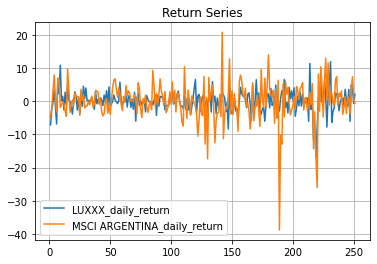

In [54]:
time_series2['LUXXX_daily_return']= time_series2['LUXXX'].pct_change()*100
time_series2['MSCI ARGENTINA_daily_return']= time_series2['MSCI ARGENTINA'].pct_change()*100
time_series2[['LUXXX_daily_return','MSCI ARGENTINA_daily_return']].plot(grid=True, label='Return Series')
plt.title('Return Series')

#### 5.1 Compute the correlation using Pearson correlation 

In [56]:
pearson_corr = dframe.corr(method = 'pearson')
pearson_corr.head()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.754584,0.823881,0.046895,0.674894,0.850111,0.337350,0.133539,-0.192526,-0.676507,...,0.168444,0.349905,-0.099556,0.556819,0.527276,0.797206,-0.147922,-0.483619,0.754859,-0.462818
MSCI ARGENTINA,0.754584,1.000000,0.740835,-0.160676,0.604493,0.747766,0.260126,-0.047239,-0.000917,-0.474811,...,0.026683,0.242801,-0.225743,0.501144,0.607563,0.661643,-0.209572,-0.459191,0.517648,-0.461817
BLP ORIENTE MEDIO,0.823881,0.740835,1.000000,-0.124534,0.387526,0.925401,0.144240,-0.114781,-0.449813,-0.616805,...,-0.184801,0.002905,-0.265565,0.318689,0.402231,0.646010,-0.340203,-0.549976,0.516283,-0.652986
MSCI AUSTRALIA,0.046895,-0.160676,-0.124534,1.000000,0.516601,-0.027924,0.755042,0.916125,0.536852,0.284185,...,0.810983,0.714497,0.894720,0.648469,0.458925,0.445205,0.775572,0.755159,0.607045,0.715744
MSCI AUSTRIA,0.674894,0.604493,0.387526,0.516601,1.000000,0.495019,0.731040,0.562506,0.438279,-0.300536,...,0.752971,0.825097,0.437568,0.934414,0.725589,0.876846,0.355420,0.122654,0.876490,0.141123


#### 5.2 Recompute the calculation, instead of using Spearman correlation 

In [59]:
spearman_corr = dframe.corr(method = 'spearman')
spearman_corr.head()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.760165,0.763908,0.008914,0.630077,0.728380,0.171258,0.014335,-0.116688,-0.538869,...,0.135903,0.284113,-0.189760,0.421563,0.386641,0.696801,-0.108966,-0.443921,0.646838,-0.445698
MSCI ARGENTINA,0.760165,1.000000,0.762681,-0.170967,0.543215,0.815686,0.189584,-0.174087,-0.049772,-0.421900,...,-0.085017,0.211169,-0.274679,0.416496,0.515793,0.611122,-0.263058,-0.502658,0.486479,-0.564665
BLP ORIENTE MEDIO,0.763908,0.762681,1.000000,-0.225116,0.305152,0.881598,0.022868,-0.222396,-0.415513,-0.453115,...,-0.270019,-0.103185,-0.373495,0.187038,0.241724,0.503483,-0.316342,-0.548127,0.382994,-0.668146
MSCI AUSTRALIA,0.008914,-0.170967,-0.225116,1.000000,0.522231,-0.222302,0.702757,0.936633,0.545906,0.408691,...,0.830269,0.706822,0.838601,0.689851,0.494837,0.493137,0.749297,0.714589,0.621821,0.727221
MSCI AUSTRIA,0.630077,0.543215,0.305152,0.522231,1.000000,0.368606,0.674107,0.472486,0.446277,-0.078353,...,0.712182,0.797891,0.403134,0.902973,0.726394,0.878057,0.324909,0.128467,0.846133,0.121610


#### 5.3 Recompute the calculation, instead of using Kendall correlation


In [60]:
kendall_corr = dframe.corr(method = 'kendall')
kendall_corr.head()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.558401,0.580535,0.026813,0.457345,0.533548,0.110099,0.052488,-0.058876,-0.365459,...,0.116739,0.192943,-0.093657,0.283880,0.277683,0.513375,-0.039841,-0.257004,0.461898,-0.277493
MSCI ARGENTINA,0.558401,1.000000,0.547587,-0.091444,0.381774,0.600645,0.158351,-0.084424,-0.022134,-0.242965,...,-0.013849,0.188705,-0.153292,0.289888,0.368558,0.408335,-0.144628,-0.281857,0.335863,-0.313350
BLP ORIENTE MEDIO,0.580535,0.547587,1.000000,-0.117372,0.233858,0.704484,0.030228,-0.115791,-0.250047,-0.306077,...,-0.116803,-0.046923,-0.190603,0.158730,0.173402,0.353949,-0.205590,-0.350471,0.263770,-0.425409
MSCI AUSTRALIA,0.026813,-0.091444,-0.117372,1.000000,0.340669,-0.131601,0.522165,0.784924,0.369000,0.297161,...,0.625055,0.497186,0.665718,0.483020,0.331689,0.303042,0.575476,0.566622,0.433441,0.599254
MSCI AUSTRIA,0.457345,0.381774,0.233858,0.340669,1.000000,0.273319,0.485170,0.324733,0.400177,-0.047303,...,0.516980,0.592171,0.284070,0.744198,0.547904,0.703788,0.250870,0.113577,0.677228,0.117056


#### 6.1 Choose one of the 35 variables to serve as your response variable (e.g. LUXXX)



In [142]:
# We chose LUXXX as our response variable
Y = dframe.LUXXX
Y

0      1390.716
1      1291.267
2      1257.086
3      1254.167
4      1298.240
         ...   
247     988.345
248    1037.211
249    1075.670
250    1068.089
251    1090.573
Name: LUXXX, Length: 252, dtype: float64

#### 7.1 Use the Pearson correlation matrix

In [145]:
# We chose LUXXX as our response variable

X=dframe.copy()
X.drop(columns=['Date', 'LUXXX'], inplace=True)
X.shape

(252, 34)

#### 7.2 Show the amount of variation explained by the first 5 components

In [153]:
from sklearn.preprocessing import StandardScaler
X_normalized=StandardScaler().fit_transform(X)


pca = PCA(n_components=5)
pca.fit(X)

print("Percentage of variance explained by each of the selected components:")
print(pca.explained_variance_ratio_) 
print("Total variance explained by the first 5 components")
print(pca.explained_variance_ratio_.sum())

Percentage of variance explained by each of the selected components:
[0.51756363 0.33009646 0.07894327 0.03678651 0.01779009]
Total variance explained by the first 5 components
0.9811799501538664


#### 7.3 How many components are needed to express 80% of the variation of the data?


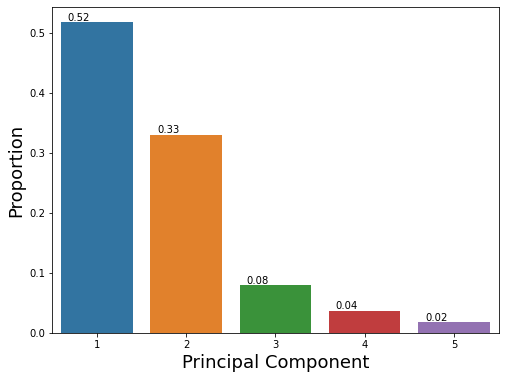

In [151]:

import seaborn as sns
dset3 = pd.DataFrame()
dset3['pca'] = range(1,6)
dset3['vari'] = pd.DataFrame(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset3)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

The first two components expressed 80% variation of the data. 

In [ ]:

Show the amount of variation explained by the first 5 components
How many components are needed to express 80% of the variation of the data?
What is your interpretation of the 1st component?

#### 7.4 What is your interpretation of the 1st component?

The first component accounts for more than half of the variance. This indicates that the data is widely disseminated or spread. 

# Q8. We will use PCA and the Lasso regression


#### What do these 2 methodologies have in common? How do they differ?

PCA can be used as a dimensionality reduction technique if you drop Principal Components based on a heuristic, but it offers no feature selection, as the Principal Components are retained instead of the original features. However, tuning the number of Principal Components retained should work better than using heuristics, unless there are many low variance components and you are simply interested in filtering them.

LASSO on the other hand can, intrinsically, perform feature selection as the coefficients of predictors are shrunk towards zero. It still requires hyperparameter tuning because there's a regularization coefficient that weights how severe is the regularization of the loss function.

#### 9.1 Run a regression of Y versus the PCA scores

In [154]:
X_r = pca.fit(X_normalized).transform(X_normalized)
X_r.shape

(252, 5)

In [158]:
# Regression score
regr_PCA = LinearRegression()
regr_PCA.fit(X_r, Y)
print("Regression score")
regr_PCA.score(X_r, Y)

Regression score


0.8737184106725846

#### 10.1 Run a linear regression of Y versus the other predictors

In [160]:
regres = LinearRegression()
regres.fit(X, Y)
print("Regression score")
regres.score(X, Y)

Regression score


0.9806055317363801

#### 10.2 For the lasso, use at least 1000 different values of the penalty parameter

In [161]:
# We created 1000 alphas
alphas = np.arange(0.001, 1.001, 0.001)
len(alphas)

1000

#### 10.3 Split the data into testing and training, with 2/3 for training and 1/3 for testing

In [163]:
# Split testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=1/3, random_state=1)

#### 10.4 Graph the overall model mismatch for each of the 1000 values of the paramter

In [165]:
# Fit Lasso model for each alpha value

test_errors=[]

for alpha in alphas:
    
    model=Lasso(alpha=alpha)
    model.fit(X_train, Y_train)
    
    Y_test_predict = model.predict(X_test)    
    test_errors.append(mean_squared_error(Y_test, Y_test_predict))

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91909.15532545005, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90881.49340177038, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89825.58527082701, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You m

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56717.5602928109, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56163.40191467342, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55613.50955377823, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You mi

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35719.99776440888, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35294.658360574074, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34879.71905665193, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You 

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18088.416543477622, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17899.21498186735, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17690.807947943846, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6707.931990492914, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6472.691359593766, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6240.222677206009, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You m

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6601.795762051974, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6537.443386760278, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6461.299303823005, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You m

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1864.88506742139, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1944.5918910350592, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2007.7973721266026, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You 

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3012.1878907544888, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2993.723896547628, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2974.6442019367532, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1850.80406245013, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1830.6783494260162, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1810.9235517199268, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You 

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1503.1909018569568, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522.2366176700161, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1546.2466835305677, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. Yo

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2044.4976661045803, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2047.2943252804107, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2050.0409056140925, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. Yo

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1980.8614461735997, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1974.557125208259, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1968.1383035803156, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1993.7206995218585, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1996.662766319845, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1999.435013692797, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You 

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1993.162694503524, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1991.5498215533735, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1989.88708219424, tolerance: 948.460388262328
  positive)
/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You m

In [167]:
print("lowest mean squared error on test data")
alphas[np.argmin(test_errors)]

lowest mean squared error on test data


0.109

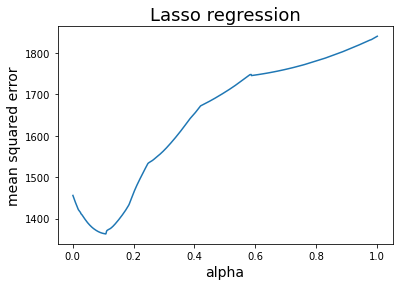

In [175]:
plt.plot(alphas, test_errors)
plt.xlabel("alpha", fontsize=14)
plt.ylabel("mean squared error", fontsize=14)
plt.title("Lasso regression", fontsize=18);

#### 10.5 Find a lasso model that includes no more than 7 predictors

In [203]:
best_reg=Lasso(alpha=alphas[np.argmin(test_errors)])
best_reg.fit(X_train, Y_train)
best_features = dframe.iloc[:,2:].columns[best_coef !=0]
best_model = pd.DataFrame({"Features":best_features, "Coefficients":best_reg.coef_[best_reg.coef_ !=1]})
best_model

/home/fabulouskorex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28595.910922847674, tolerance: 948.460388262328
  positive)


,Features,Coefficients
0,MSCI ARGENTINA,-46.734333
1,BLP ORIENTE MEDIO,3.914027
2,MSCI AUSTRALIA,-5.195193
3,MSCI AUSTRIA,25.336341
4,MSCI BELGIUM,41.095624
5,MSCI BRAZIL,0.000000
6,MSCI CANADA,61.697362
7,MSCI CHINA,-0.000000
8,MSCI DENMARK,27.490842
9,MSCI EM ASIA,50.657815


In [197]:
# Get absolute value as importance
coefficients=best_reg.coef_
importance = np.abs(coefficients)
print("Importance")
importance

Importance


array([46.73433304,  3.914027  ,  5.19519264, 25.33634115, 41.09562389,
        0.        , 61.69736167,  0.        , 27.4908418 , 50.65781512,
       37.5758689 , 34.28165884, 27.78713479,  5.36393217, 23.04611511,
       84.75489539, 43.73465793, 54.78516346, 84.24671033, 36.56838114,
       38.7210266 , 46.08400299, 66.65600722, 14.39129275,  1.45150641,
       48.63625012,  0.18402056, 27.8539243 , 34.87556272, 95.60499348,
       35.52079257, 95.97931032,  0.        ,  1.20067103])

In [198]:
# We sort and select the top 7 predictors
features_importance = {'Features':X.columns,'Importance':importance}
 
df_features=pd.DataFrame(features_importance)
selected_7_predictors=df_features.sort_values(by=['Importance'], ascending=False)[0:7].Features.values
print("Selected predictors")
selected_7_predictors

Selected predictors


array(['MSCI SWITZERLAND', 'MSCI SPAIN', 'MSCI GERMANY', 'MSCI ITALY',
       'MSCI NETHERLANDS', 'MSCI CANADA', 'MSCI INDIA'], dtype=object)

In [202]:
# columns selection for predictors
X_selected=X[selected_7_predictors]
X_selected.shape

(252, 7)

In [201]:
# fitting of the final model to the selected predictors
X_train_selected, X_test_selected, Y_train, Y_test = train_test_split(X_selected, Y, test_size=1/3, random_state=1)
best_reg_selected=Lasso(alpha=alphas[np.argmin(test_errors)])
best_reg_selected.fit(X_train_selected, Y_train)
print("The seven coefficients of the model:")
best_reg_selected.coef_

The seven coefficients of the model are:


array([-1.0143132 , 10.15652002,  7.64310851, -8.72945924, -4.35986131,
        0.6617353 , -0.03532224])

#### 11. Which model provides a better fit to the data and why?

PCA provides a better fit to the data due to its dimensionality reduction technique. PCA, while reducing the number of features, does not care about the interpretability of features. The only thing that it cares about is preserving the maximum variance, thereby resulting in a better fit. 

#### 12. Which model provides better interpretation of the results?

Lasso provides more interpretability of results and performs feature selection, as compared to PCA. PCA while performing the dimensionality reduction in regression ignores the relationship between X and Y variables. Therefore, dropping low variance components while ignoring their relationship to Y loses interpretability.

#### 13. How did your group divide the work?

Unfortunately, we were left with just two members in the group as one of them un-enrolled. Thus, we both did whatever we could and collated our respective parts at the end. One person was more responsible for the theory and basic questions, while the other did the entire regression and PCA parts.